In [1]:
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')


In [2]:
#average rating
rating = DataFrame.from_csv("title.ratings.tsv", index_col=None, sep="\t")
#episode and season info
episode=DataFrame.from_csv("episode.tsv", index_col=None, sep="\t")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [4]:
#average rating
rating = DataFrame.from_csv("title.ratings.tsv", index_col=None, sep="\t")
#episode and season info
episode=DataFrame.from_csv("episode.tsv", index_col=None, sep="\t")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [6]:
rating

,tconst,averageRating,numVotes
0,tt0000001,5.8,1400
1,tt0000002,6.5,164
2,tt0000003,6.6,989
3,tt0000004,6.4,98
4,tt0000005,6.2,1684
5,tt0000006,5.6,87
6,tt0000007,5.5,566
7,tt0000008,5.6,1508
8,tt0000009,5.5,67
9,tt0000010,6.9,5021


In [7]:
#we can use merge to get the data with the same titles tt0000000
re=rating.merge(episode)

In [8]:
#delete the data with \N
re=re[re.seasonNumber != r'\N']
re=re[re.episodeNumber != r'\N']
re=re[re.tconst != r'\N']

In [9]:
#we don't need parentTconst,drop it
re = re.drop('parentTconst', 1)
#convert the entries to numeric
re.convert_objects(convert_numeric=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,tconst,averageRating,numVotes,seasonNumber,episodeNumber
40,tt0041951,7.4,35,1,9
57,tt0044093,4.3,10,1,6
68,tt0045960,7.1,140,2,3
74,tt0046855,6.7,89,1,4
75,tt0046864,6.4,5,5,20
84,tt0047852,3.5,14,1,15
85,tt0047961,8.8,12,6,5
87,tt0048302,6.2,25,1,6
88,tt0048378,5.9,158,1,6
90,tt0048462,6.9,10,1,3


In [10]:
#set 'tconst' to the index column
pre=re.set_index('tconst')

In [11]:
#we now want to see the relationship between number of episodes and ratings
#so we drop 'numVotes' and 'seasonNumber' since we now only need the other variables
ratingandepisode=pre.drop('numVotes',1)
ratingandepisode=ratingandepisode.drop('seasonNumber',1)

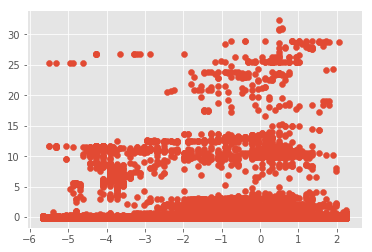

In [12]:
#preprocess data and get the arrays we need
processed=preprocessing.scale(ratingandepisode)

#plot the scaled data
x,y=processed.T
plt.scatter(x,y)

In [13]:
#take a look at the data,
#the data look like there are three clusters: up, middle and bottom
#so we will initially set the n=5 for the number of clusters (Please try
#the case where n=3 and n=4, and what do you find?)

#We use K-means clustering
X=processed
kmeans = KMeans(n_clusters=5) #what if n_clusters=3 or 4?
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


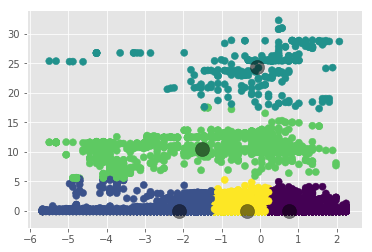

In [14]:
#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [15]:
#what do we know from n_clusters=3,4,5?

###
#now, we want to see the relationship between averageRating and numVotes
rn=re

#set index
rnpre=rn.set_index('tconst')

#drop seasonNumber and episodeNumber
ratingandnum=rnpre.drop('seasonNumber',1)
ratingandnum=ratingandnum.drop('episodeNumber',1)


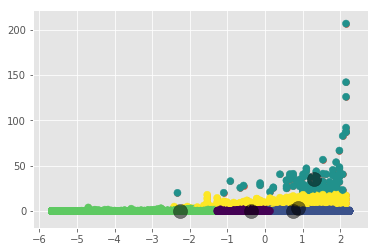

In [16]:
#scale data
processedrn=preprocessing.scale(ratingandnum)
xnew2,ynew2=processedrn.T

#plot data
plt.scatter(xnew2,ynew2)

#see the data, we set n_cluster=5 first
X2=processedrn
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)
y2_kmeans = kmeans.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#Interpretation: if the number of votes is low, then they cannot get a higher rating at all
#if the number of votes is high, there might be a chance to get a very high rating

#what if n_clusters=3 or 4? what is the difference?
#End of code

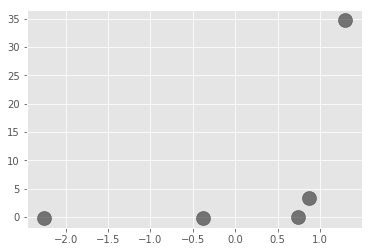

In [17]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
